### Data Fetching and EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import LabelEncoder


In [ ]:
data= pd.read_csv('student-mat.csv')

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<ipython-input-22-aab807aa8ac3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)


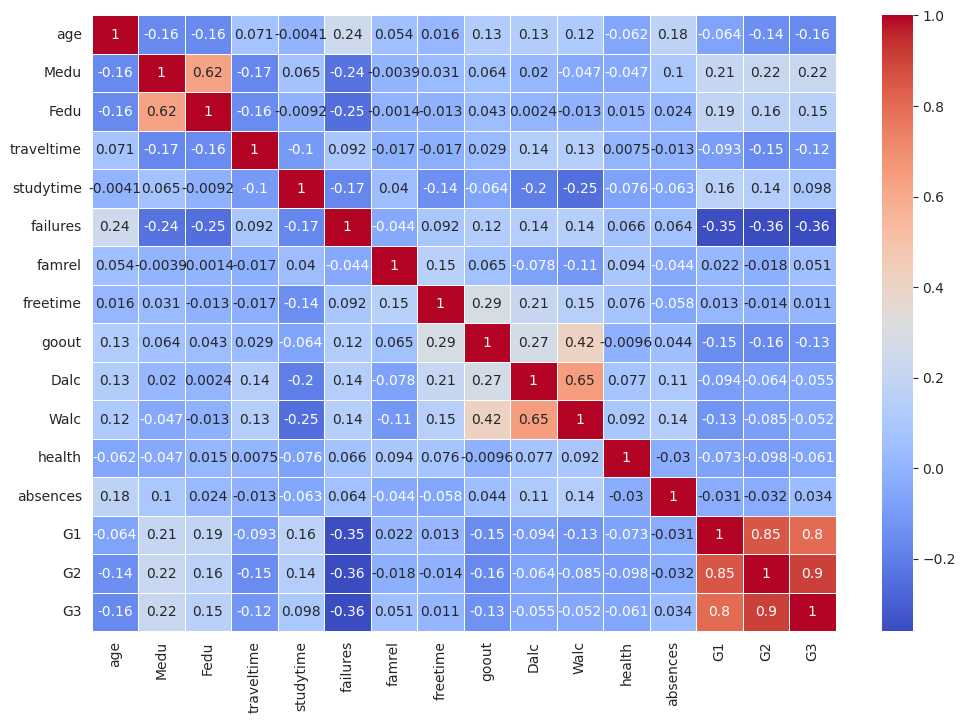

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

<Axes: >

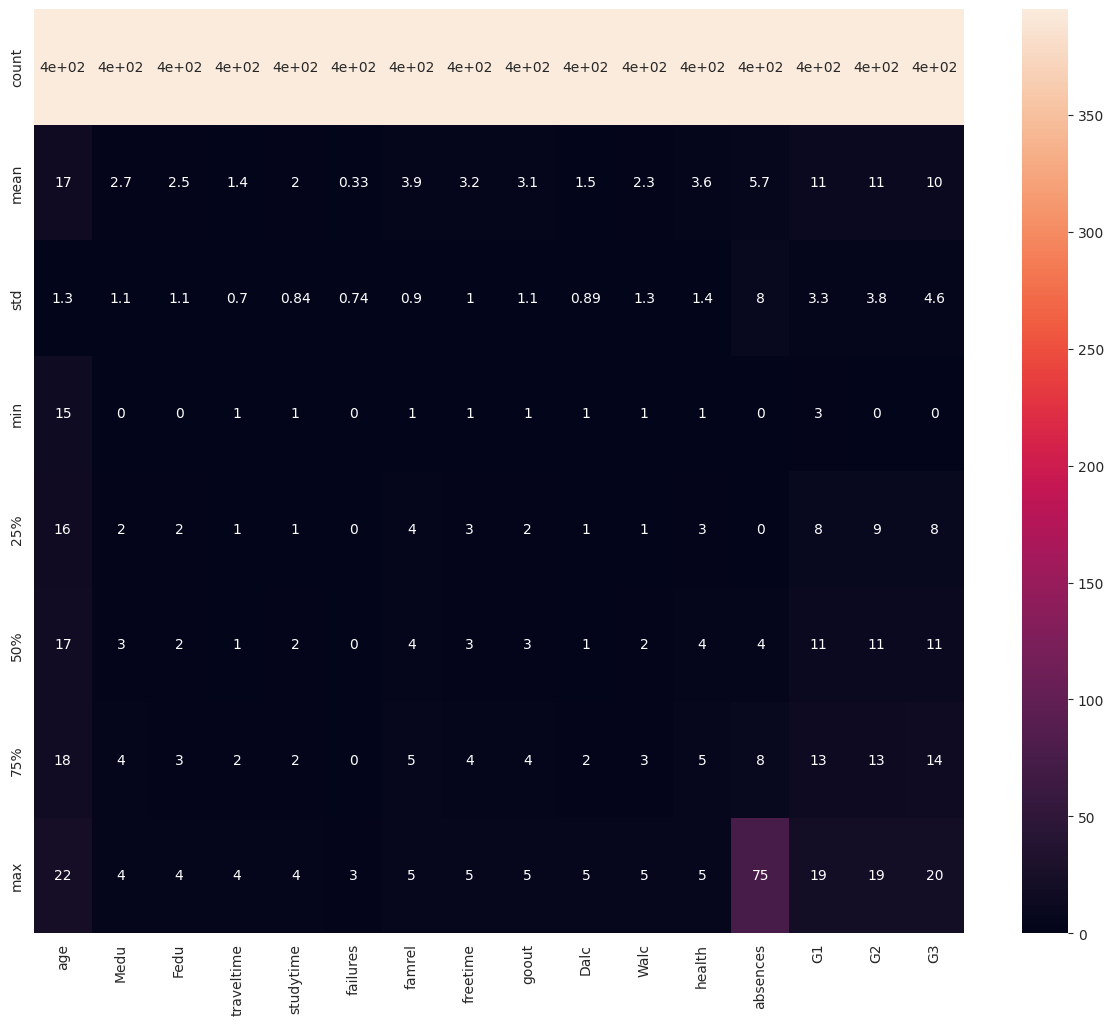

In [ ]:
plt.figure(figsize=[15,12])
sns.heatmap(data.describe(),annot=True)

<Axes: xlabel='sex', ylabel='count'>

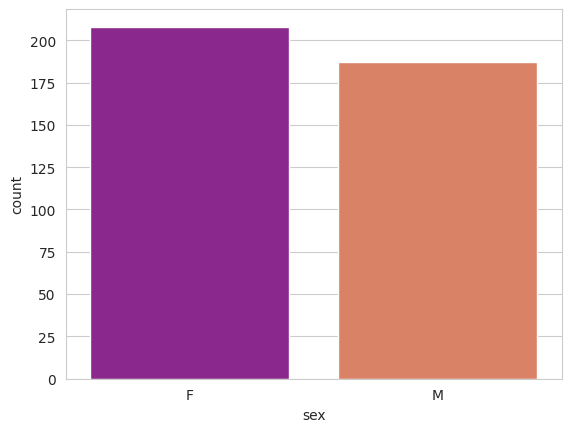

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=data,palette='plasma')

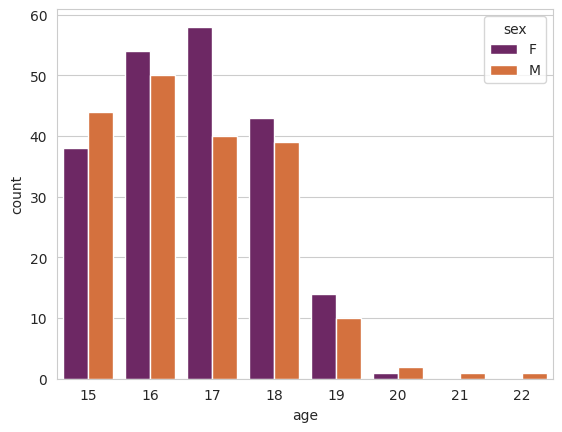

In [ ]:
p = sns.countplot(x='age',hue='sex', data=data, palette='inferno')

this show count of male and female in a age group

<Axes: xlabel='address', ylabel='count'>

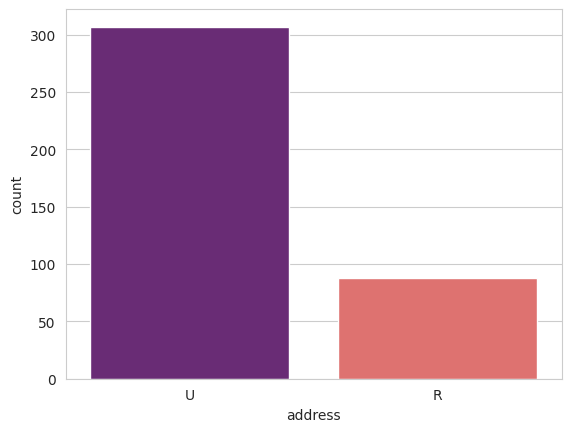

In [ ]:
sns.countplot(x='address',data=data,palette='magma')

Here U represents urban and r represents rural

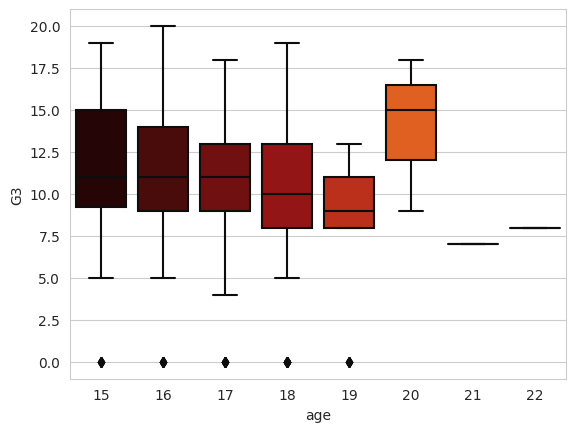

In [ ]:
p= sns.boxplot(x='age', y='G3',data=data,palette='gist_heat')

Graph is to see if age effects the grade

<Axes: xlabel='G3', ylabel='Density'>

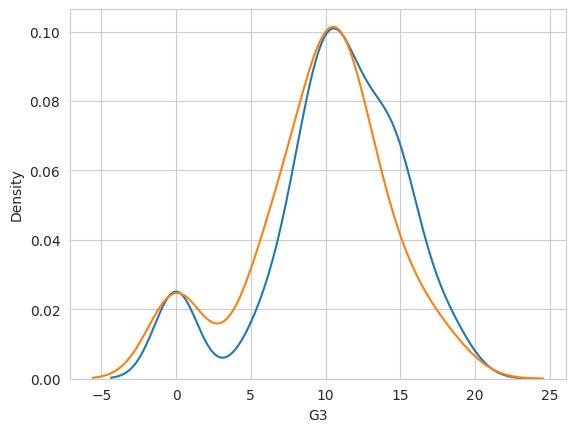

In [ ]:
sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban' )
sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural' )

the above plot is to compare the grades difference if the student is from rural or urban area

In the above yellow represents rural where blue represents urban

<ipython-input-29-659c4da5e435>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.swarmplot(x=data['romantic'],y=data['G3'],palette='YlOrBr')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


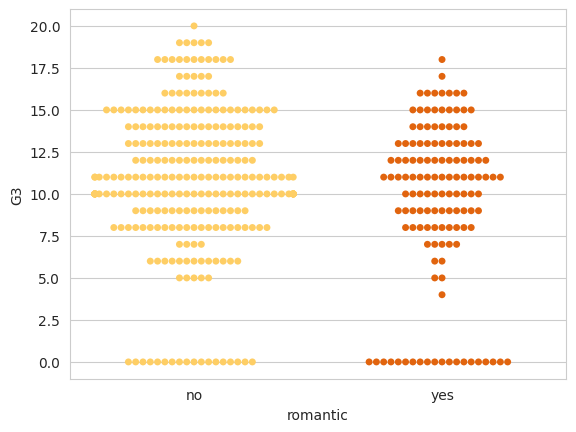

In [ ]:
b = sns.swarmplot(x=data['romantic'],y=data['G3'],palette='YlOrBr')

Linear Regression and Random forest classifier

In [ ]:
le=LabelEncoder()

for i in range (23):
  data.iloc[:,i] = le.fit_transform(data.iloc[:,i])

<ipython-input-23-1bb14a72c97d>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = le.fit_transform(data.iloc[:,i])
<ipython-input-23-1bb14a72c97d>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = le.fit_transform(data.iloc[:,i])
<ipython-input-23-1bb14a72c97d>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data['G3'], test_size = 0.25, random_state=42)

In [ ]:
def calc_errors(pred, true):
    abs_error = np.mean(abs(pred -true))
    sq_error = np.sqrt(np.mean((pred- true) **2))
    return abs_error, sq_error


In [ ]:
med_pred = X_train['G3'].median()
med_preds = [med_pred for _ in range(len(X_test))]

true = X_test['G3']

In [ ]:
mb_mae, mb_rmse = calc_errors(med_preds, true)

print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [ ]:
def eval_models(X_train, X_test, y_train, y_test):

    mod_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    LinReg = LinearRegression()
    RandFor = RandomForestRegressor(n_estimators = 100)
    GradBoost = GradientBoostingRegressor(n_estimators = 50)

    mod_list = [LinReg , RandFor , GradBoost]


    result = pd.DataFrame(columns=['Mean Absolute Error', 'Root Mean Squared Error'], index=mod_names)

    #baseline scores
    base = np.median(y_train)
    base_mae = np.mean(abs(base - y_test))
    base_rmse = np.sqrt(np.mean((base - y_test) ** 2))

    result.loc['Baseline Stats', :] = [base_mae, base_rmse]


    for i, model in enumerate(mod_list):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mae, rmse = calc_errors(predictions, y_test)

        model_name = mod_names[i]
        result.loc[model_name, :] = [mae, rmse]

    return result

In [ ]:
results = eval_models(X_train, X_test, y_train, y_test)
results

,Mean Absolute Error,Root Mean Squared Error
Linear Regression,1.382405,2.137349
Random Forest,1.061919,1.711913
Gradient Boosting,1.006997,1.699204
Baseline Stats,3.787879,4.825228


#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
np.unique(data['G3'])

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
preds = model.predict(X_test)

In [ ]:
dt_mse = mse(y_test, preds)
dt_mae = mae(y_test, preds)
dt_rmse = math.sqrt(dt_mse)

In [ ]:
print("MSE:", dt_mse)
print("MAE:",dt_mae)
print("RMSE:",dt_rmse)

MSE: 2.3535353535353534
MAE: 1.121212121212121
RMSE: 1.534123643496623


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import math

In [ ]:
kernels = ['linear', 'poly', 'rbf']

In [ ]:
mses = []
maes = []
rmses = []

In [ ]:
for kernel in kernels:
  svm = SVC(kernel = kernel)
  svm.fit(X_train, y_train)
  preds = svm.predict(X_test)

  svm_mse = mse(y_test, preds)
  svm_mae = mae(y_test, preds)
  svm_rmse = math.sqrt(svm_mse)

  mses.append(svm_mse)
  maes.append(svm_mae)
  rmses.append(svm_rmse)

  # print("For Kernel:",kernel)
  # print("MSE: ", svm_mse)
  # print("MAE: ", svm_mae)
  # print("RMSE: ", svm_rmse)

  # print("\n\n")


In [ ]:
svm_data = {
    'Kernel': ['Linear', 'Poly', 'RBF'],
    'MSE': mses,
    'MAE': maes,
    'RMSE': rmses
}

In [ ]:
svmdf = pd.DataFrame(svm_data)

In [ ]:
print(svmdf)

   Kernel       MSE       MAE      RMSE
0  Linear  0.131313  0.111111  0.362372
1    Poly  1.292929  0.606061  1.137070
2     RBF  2.353535  1.121212  1.534124


In [ ]:
rmses

[0.36237153766973934, 1.1370704872299224, 1.534123643496623]